In [11]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [12]:
random.seed(42)
np.random.seed(42)

# Step 1: Generating Dataset
sample = 20


In [13]:
x1 = np.where(np.array([random.random() for _ in range(sample)]) < 0.5, 0, 1)
x2 = np.where(np.array([random.random() for _ in range(sample)]) < 0.5, 0, 1)


In [14]:
y = np.logical_or(x1, x2).astype(int)

In [15]:
x = np.column_stack((x1, x2))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train(x_train, y_train, epochs=100, lr=0.01):
    # Initialize weights and bias
    weights = np.random.randn(2)
    bias = np.random.randn(1)
    losses = []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred = sigmoid(np.dot(x_train, weights) + bias)
        
        # Compute loss
        loss = -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
        losses.append(loss)
        
        # Backpropagation
        dw = np.dot(x_train.T, (y_pred - y_train)) / sample
        db = np.mean(y_pred - y_train)
        
        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db
        
    return weights, bias, losses

In [17]:
weights, bias, losses = train(x_train, y_train)

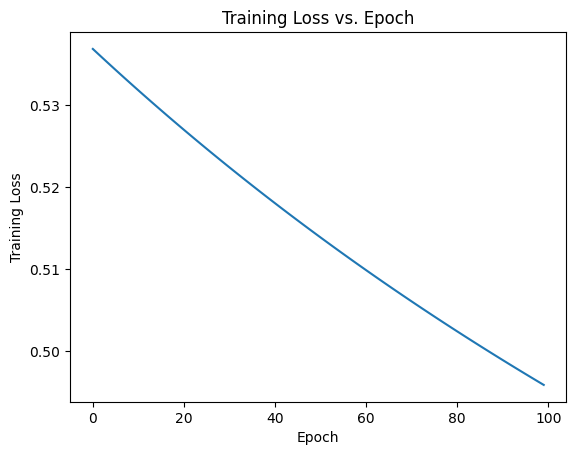

In [18]:
plt.plot(losses)
plt.title('Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

In [19]:
def predict(x_test, weights, bias):
    return sigmoid(np.dot(x_test, weights) + bias)

def accuracy(y_true, y_pred):
    return np.mean((y_pred > 0.5) == y_true)

y_pred_test = predict(x_test, weights, bias)
acc = accuracy(y_test, y_pred_test)
print("Test Accuracy:", acc)

Test Accuracy: 1.0
